In [53]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc


In [54]:
import scipy as sp
from scipy.integrate import solve_ivp

In [55]:
t = 1/31557600
l = 1/149597870700

In [56]:
class cosmic_ball:  
  def __init__(self, weight, speed, coordinate):
    self.weight = weight
    self.speed = speed
    self.coordinate = coordinate


  def relative_coordinates(self, c):
    q = []
    for i in range(len(c)):
      q.append(self.coordinate[i] - c[i])
    return q    

  def momentum (self, v):
    r = []
    for i in range(len(v)):
      r.append(self.weight * (v[i] - self.speed[i]))
    return r


In [57]:
class center_of_mass:
    def __init__(self, num=0):
      self.num = num 
      
    def coordinate(self, m, x):
      q = []
      for i in range(len(m)):
        q.append(m[i]*x[i])
      return sum(q) / sum(m)

    def speed(self, m, v):
      q = []
      for i in range(len(m)):
        q.append(m[i]*v[i])
      return sum(q)/sum(m)



In [58]:
Earth = cosmic_ball(1, [0.0 , 29780*l/t], [1.0, 0.0])
Moon = cosmic_ball(Earth.weight / 81.3, [0.0, 30803*l/t] ,[1.0+405696000*l, 0.0] )
Sun = cosmic_ball(332946 * Earth.weight, [0.0, 0.0], [0.0,0.0])

In [59]:
C = center_of_mass()
C_x = C.coordinate([Earth.weight,Sun.weight,Moon.weight], [Earth.coordinate[0], Sun.coordinate[0] , Moon.coordinate[0]])
C_y = C.coordinate([Earth.weight,Sun.weight,Moon.weight], [Earth.coordinate[1], Sun.coordinate[1] , Moon.coordinate[1]])



In [60]:
C_vx = C.speed([Earth.weight,Sun.weight,Moon.weight], [Earth.speed[0], Sun.speed[0] , Moon.speed[0]])
C_vy = C.speed([Earth.weight,Sun.weight,Moon.weight], [Earth.speed[1], Sun.speed[1] , Moon.speed[1]])


In [61]:
E_rel_coord = Earth.relative_coordinates([C_x,C_y])
S_rel_coord = Sun.relative_coordinates([C_x,C_y])
M_rel_coord = Moon.relative_coordinates([C_x,C_y])


In [62]:
E_mom = Earth.momentum([C_vx,C_vy])
S_mom = Sun.momentum([C_vx,C_vy])
M_mom = Moon.momentum([C_vx,C_vy])


In [63]:
ini = S_rel_coord + E_rel_coord + M_rel_coord + S_mom + E_mom + M_mom


In [64]:
T = np.linspace(0,1,100)
G = 6.67*10**(-11)*l**3/(t**2 /(5.97*10**24))


In [65]:
def f(t, y):
  q = y.copy()
  q[0] = q[6] / Sun.weight
  q[1] = q[7] / Sun.weight
  q[2] = q[8] / Earth.weight
  q[3] = q[9] / Earth.weight
  q[4] = q[10] / Moon.weight
  q[5] = q[11] / Moon.weight
  q[6] = G * Sun.weight * Earth.weight * (y[2]-y[0])/((y[2]-y[0])**2+(y[3]-y[1])**2)**1.5 +  G * Sun.weight * Moon.weight*(y[4]-y[0])/((y[4]-y[0])**2+(y[5]-y[1])**2)**1.5 
  q[7] = G * Sun.weight *  Earth.weight * (y[3]-y[1])/((y[2]-y[0])**2+(y[3]-y[1])**2)**1.5 + G * Sun.weight * Moon.weight*(y[5]-y[1])/((y[4]-y[0])**2+(y[5]-y[1])**2)**1.5 
  q[8] =  G * Earth.weight *  Sun.weight *(y[0]-y[2])/((y[0]-y[2])**2+(y[1]-y[3])**2)**1.5 +  G * Earth.weight * Moon.weight*(y[4]-y[2])/((y[4]-y[2])**2+(y[5]-y[3])**2)**1.5 
  q[9] =  G * Earth.weight * Sun.weight *(y[1]-y[3])/((y[0]-y[2])**2+(y[1]-y[3])**2)**1.5 + G * Earth.weight * Moon.weight*(y[5]-y[3])/((y[4]-y[2])**2+(y[5]-y[3])**2)**1.5 
  q[10] = G * Moon.weight * Sun.weight *(y[0]-y[4])/((y[0]-y[4])**2+(y[1]-y[5])**2)**1.5 + G * Moon.weight * Earth.weight*(y[2]-y[4])/((y[2]-y[4])**2+(y[3]-y[5])**2)**1.5 
  q[11] = G * Moon.weight * Sun.weight *(y[1]-y[5])/((y[0]-y[4])**2+(y[1]-y[5])**2)**1.5 + G * Moon.weight *  Earth.weight*(y[3]-y[5])/((y[2]-y[4])**2+(y[3]-y[5])**2)**1.5 
  return q

In [66]:
sol=solve_ivp(f, [0.,1.], ini, t_eval=T, method='Radau')


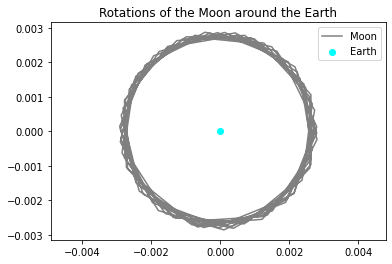

In [69]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Rotations of the Moon around the Earth')
ax.scatter(0.0,0.0, color = 'cyan')
ax.plot(sol.y[4] - sol.y[2] ,sol.y[5] - sol.y[3], color =  'grey' )
ax.legend(['Moon', 'Earth'])
plt.axis('equal')
plt.show()

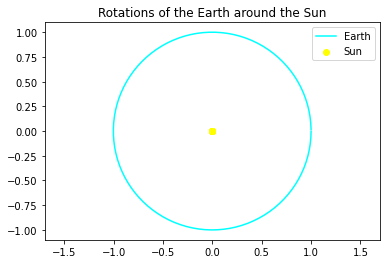

In [70]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Rotations of the Earth around the Sun')
ax.plot(sol.y[2],sol.y[3], color = 'cyan')
ax.scatter(sol.y[0],sol.y[1], color = 'yellow')
ax.legend(['Earth', 'Sun'])
plt.axis('equal')
plt.show()